# Variables Categóricas / *Dummy Variables*

Las variables categóricas son aquellas que pueden tomar valores de un número finito de categorías (Sexo: hombre o mujer; Pago: Sí o No; Equipo: equipo de fútbol americano al que apoya...). Cuando las variables categóricas no tienen un orden lógico reciben el nombre de __nominales__ y cuando sí lo siguen reciben el nombre de __ordinales__.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {'Nombre': ['Sergio', 'Guadalupe', 'Roldi'],
       'Sexo': ['Hombre', 'Mujer', 'Hombre'],
       'Compañía': ['Movistar', 'Telcel', 'Telcel'],
       'Salario': [3000,10000, 0],
       'Recargas': [10,8,3],
       'Opinión del Servicio': ['Excelente','Malo', 'Bueno']}

df = pd.DataFrame(data)
df

,Nombre,Sexo,Compañía,Salario,Recargas,Opinión del Servicio
0,Sergio,Hombre,Movistar,3000,10,Excelente
1,Guadalupe,Mujer,Telcel,10000,8,Malo
2,Roldi,Hombre,Telcel,0,3,Bueno


Dado que los algoritmos de *machine learning* no trabajan con strings sino con números, estas variables deben ser transformadas antes de ser implementadas en los modelos de predicción.

## Tratamiento de Variables Ordinales

Supongamos que el siguiente *DataFrame* corresponde a una columna de una base de datos con la que estamos trabajando:

In [3]:
data = {'servicio': ['Muy Satisfecho', 'Satisfecho',
                    'Muy Insatisfecho', 'Satisfecho', 'Insatisfecho']}
customers = pd.DataFrame(data)
customers

,servicio
0,Muy Satisfecho
1,Satisfecho
2,Muy Insatisfecho
3,Satisfecho
4,Insatisfecho


En este caso vamos a asignar el menor valor 0 a la variable categórica Muy Insatisfecho, 1 a Insatisfecho, 2 a Satisfecho y 3 a Muy Satisfecho:

In [4]:
nominal = {"Muy Insatisfecho": 0, "Insatisfecho": 1, "Satisfecho": 2, "Muy Satisfecho": 3}
nominal

{'Muy Insatisfecho': 0,
 'Insatisfecho': 1,
 'Satisfecho': 2,
 'Muy Satisfecho': 3}

In [5]:
customers.replace(nominal)

,servicio
0,3
1,2
2,0
3,2
4,1


In [6]:
customers.replace(nominal, inplace = True)

In [7]:
customers

,servicio
0,3
1,2
2,0
3,2
4,1


## Tratamiento de Variables Nominales

Supongamos que el siguiente DataFrame corresponde a una columna de una base de datos con la que estamos trabajando:

In [8]:
data = {'country': ['Belgium', 'France', 'France', 'Netherlands', 'Belgium']}
countries = pd.DataFrame(data)
countries

,country
0,Belgium
1,France
2,France
3,Netherlands
4,Belgium


In [9]:
pd.get_dummies(countries)

,country_Belgium,country_France,country_Netherlands
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0


## Multicolinealidad

La **multicolinealidad** es una situación en la que se presenta una _fuerte correlación entre variables explicativas de un modelo predictivo de regresión lineal múltiple_.

$ y = \beta_{0} + \beta_{1}x_{1} +  \beta_{2}x_{2} + ... + \beta_{m}x_{m}$

Un caso extremo de variables correlacionadas puede generar multicolinealidad, que consiste en tener redundancias entre tus variables predictoras. La multicolinealidad perfecta o casi perfecta ocurre si una variable predictiva puede ser expresada como o casi como combinación lineal de otra u otras variables lo que lleva a que valores $\beta$ obtenidos presenten problemas de precisión y estabilidad.

A resumidas cuentas: **la multicolinealidad afecta la capacidad del modelo para hacer predicciones acertadas**.

Si utilizamos un algoritmo de regresión con variables colineales el *performance* del modelo se verá afectado, por lo que debemos remover dichas variables. **En el caso de árboles, clustering o vecinos-cercanos no es necesario tener en cuenta la multicolinealidad**.

Más información [acá](http://www.hrc.es/bioest/Reglin_15.html).

In [10]:
data = {'Nombre': ['Sergio', 'Guadalupe', 'Roldi'],
        'Compañía': ['Movistar', 'Telcel', 'Telcel'],
        'Recargas por semana': [10,8,3],
        'Salario': [10000, 5000, 0],
        'Recargas cada siete días': [10, 8, 3]}
       
df = pd.DataFrame(data)

La multicolinealidad ocurre cuando:

+ Una variable A se incluye múltiples veces por error

In [11]:
df

,Nombre,Compañía,Recargas por semana,Salario,Recargas cada siete días
0,Sergio,Movistar,10,10000,10
1,Guadalupe,Telcel,8,5000,8
2,Roldi,Telcel,3,0,3


+ Una variable está perfectamente correlacionadas con otra variable.

In [12]:
data = {'Nombre': ['Sergio', 'Guadalupe', 'Roldi'],
        'Compañía': ['Movistar', 'Telcel', 'Telcel'],
        'Número de Recargas de 100 pesos': [3,5,1],
       'Dinero gastado en Recargas de 100 pesos': [300,500,100]}
       
pd.DataFrame(data)

,Nombre,Compañía,Número de Recargas de 100 pesos,Dinero gastado en Recargas de 100 pesos
0,Sergio,Movistar,3,300
1,Guadalupe,Telcel,5,500
2,Roldi,Telcel,1,100


+ P dummies, en lugar de P - 1 dummies.

In [13]:
pd.get_dummies(countries)

,country_Belgium,country_France,country_Netherlands
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0


Para solucionar esto hay que deshacernos de alguna de estas columnas con la opción **drop_first** de la función get_dummies:

In [14]:
pd.get_dummies(countries, drop_first = True)

,country_France,country_Netherlands
0,0,0
1,1,0
2,1,0
3,0,1
4,0,0


# Ejercicio

* Usar la función get_dummies para tratar el siguiente DataFrame con variables categóricas.

In [15]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


---

In [16]:
pd.get_dummies(countries, drop_first=1)

,population,area,country_France,country_Germany,country_Netherlands,country_United Kingdom,capital_Berlin,capital_Brussels,capital_London,capital_Paris
0,11.3,30510,0,0,0,0,0,1,0,0
1,64.3,671308,1,0,0,0,0,0,0,1
2,81.3,357050,0,1,0,0,1,0,0,0
3,16.9,41526,0,0,1,0,0,0,0,0
4,64.9,244820,0,0,0,1,0,0,1,0


# Ejercicio:
* Cargar el dataset de titanic 
* Hacer OneHotEncoding y asegurarse de que no haya multicolinealidad

## Otros parámetros del método get_dummies:

In [17]:
cine = {'spoken_languages': ['English, German, Asgardian', 'Spanish, English', 
                             'French, Portuguese', 'Italian, French', 'Spanish']}
cine = pd.DataFrame(cine)  
cine

,spoken_languages
0,"English, German, Asgardian"
1,"Spanish, English"
2,"French, Portuguese"
3,"Italian, French"
4,Spanish


In [18]:
cine.values

array([['English, German, Asgardian'],
       ['Spanish, English'],
       ['French, Portuguese'],
       ['Italian, French'],
       ['Spanish']], dtype=object)

In [19]:
pd.get_dummies(cine)

,"spoken_languages_English, German, Asgardian","spoken_languages_French, Portuguese","spoken_languages_Italian, French",spoken_languages_Spanish,"spoken_languages_Spanish, English"
0,1,0,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [20]:
cine['spoken_languages'].str.get_dummies(sep = ', ')

,Asgardian,English,French,German,Italian,Portuguese,Spanish
0,1,1,0,1,0,0,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0
4,0,0,0,0,0,0,1


In [21]:
casa = {'Cerca': [np.NAN, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']}
casa = pd.DataFrame(casa)
casa

,Cerca
0,NaN
1,MnPrv
2,GdWo
3,GdPrv
4,MnWw


In [22]:
pd.get_dummies(casa, dummy_na = True)

,Cerca_GdPrv,Cerca_GdWo,Cerca_MnPrv,Cerca_MnWw,Cerca_nan
0,0,0,0,0,1
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


--------
# Visualización de Datos y Detección de *Outliers*

<img src="Imagenes/housew.jpg">

El *dataset* se extrajo de [__*Kaggle*__](https://www.kaggle.com/) y almacena todas las características de casas vendidas en Iowa.

In [23]:
train = pd.read_csv('Datos/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train.iloc[:, 5: 18]

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual
0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7
1,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6
2,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7
3,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7
4,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6
1456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6
1457,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7
1458,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5


In [25]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Descripción de algunas variables: 

* SalePrice: precio al que se vendió la casa
* OverallQual: condición de la casa (del 1 al 10)
* GrLvArea: área de zonas verdes y sala
* GarageCars: número de coches que caben en el garage
* GarageArea: área total del garage
* 1stFlrSF: área total del primer piso
* FullBath: número de baños completos
* TotRmsAbvGrd: número de cuartos
* YearBuilt: año de construcción

## Análisis Estadístico de la Variable SalePrice

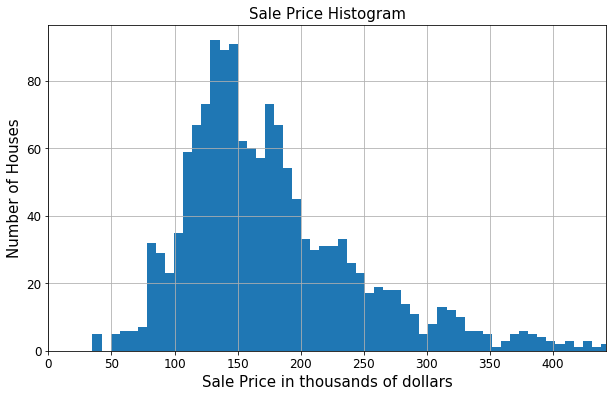

In [26]:
plt.figure(figsize = (10,6))
(train.SalePrice/1000).hist(bins = 100)
plt.title('Sale Price Histogram', fontsize = 15)
plt.xlabel('Sale Price in thousands of dollars', fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0 , (train.SalePrice/1000).quantile(0.99));

In [27]:
(train.SalePrice/1000).describe()

count    1460.000000
mean      180.921196
std        79.442503
min        34.900000
25%       129.975000
50%       163.000000
75%       214.000000
max       755.000000
Name: SalePrice, dtype: float64

## Análisis Exploratorio de las Variables Independientes

### Living Area

Opción 1: 

Usar **MatplotLib** como hasta ahora.

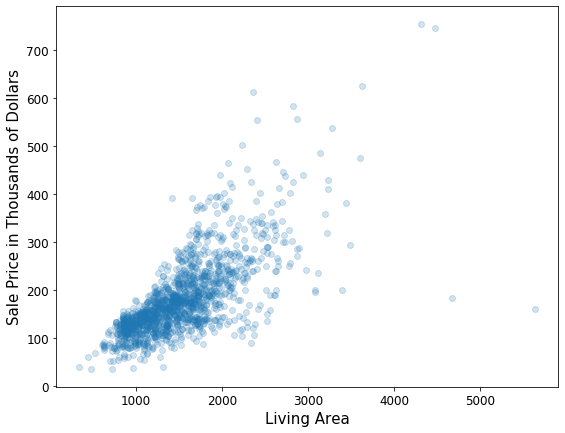

In [28]:
plt.figure(figsize=(9,7))
plt.scatter(train.GrLivArea, train.SalePrice/1000, alpha =0.2)
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Opción 2:

* Usar **seaborn**.

In [29]:
import seaborn as sbn

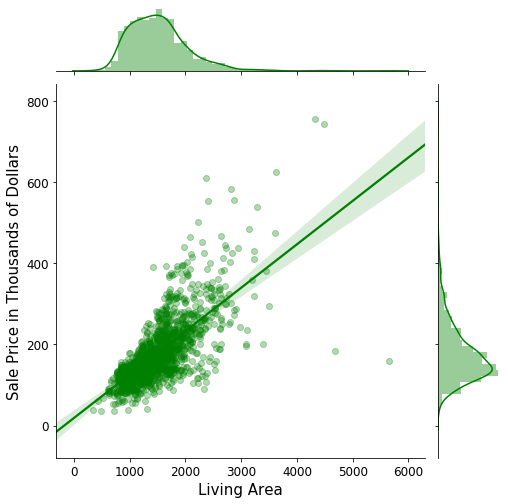

In [30]:
sbn.jointplot(train.GrLivArea, (train.SalePrice/1000), kind = 'reg', 
              color = 'g', height = 7, 
              scatter_kws=dict(alpha=0.3))
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

A medida que *Living Area* aumenta obviamente sube el precio de la casa. En la gráfica vemos 2 *outliers* en los que en un living area de más de 4000 unidades cuadradas tienen un precio demasiado bajo. Vamos a remover estos dos puntos:

In [31]:
train[(train['GrLivArea']> 4000) & (train['SalePrice'] < 300000)].index

Int64Index([523, 1298], dtype='int64')

In [32]:
train[(train['GrLivArea']> train.GrLivArea.quantile(0.999)) 
           & (train['SalePrice'] < train.SalePrice.quantile(0.93))].index

Int64Index([523, 1298], dtype='int64')

In [33]:
train.drop(train[(train['GrLivArea']> train.GrLivArea.quantile(0.999)) 
           & (train['SalePrice'] < train.SalePrice.quantile(0.93))].index).reset_index(drop = True).iloc[520:530,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,106250
521,522,20,RL,90.0,11988,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,150000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
523,525,60,RL,95.0,11787,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,315750
524,526,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,176000
525,527,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,132000
526,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
527,529,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,86000
528,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
529,531,80,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,175000


In [34]:
train = train.drop(train[(train['GrLivArea']> train.GrLivArea.quantile(0.999)) 
           & (train['SalePrice'] < train.SalePrice.quantile(0.93))].index).reset_index(drop = True)

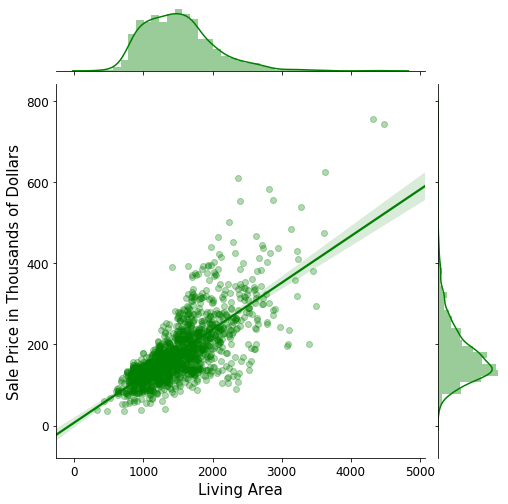

In [35]:
sbn.jointplot(train.GrLivArea, (train.SalePrice/1000), kind = 'reg', color = 'g', height = 7,
             scatter_kws=dict(alpha=0.3))
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

### OverallQual

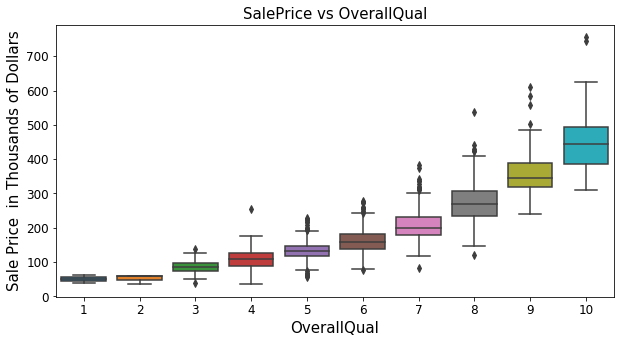

In [36]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.OverallQual,(train.SalePrice/1000))
plt.title('SalePrice vs OverallQual', fontsize = 15)
plt.xlabel('OverallQual',fontsize = 15)
plt.ylabel('Sale Price  in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

A medida que la calidad de la casa aumenta, también lo hace su precio. Nada más que decir.

### ¿Saben lo que son los boxplots?

----------------------------

## Boxplots

Un boxplot es una _forma estandarizada de desplegar la distribución de datos_ basados en el resumen de cinco números, a saber:

* "Mínimo"
* Primer Cuartil ($Q_1$)
* Mediana
* Tercer Cuartil ($Q_3$)
* "Máximo"

A partir de ellos se pueden discernir *outliers*, si los datos son simétricos, si están sesgados (cargados a la derecha o a la izquierda) y también si están fuertemente concentrados en alguna zona.

Para algunos *datasets*, se requiere más información de la proporcionada por las medias de tendencia central (mediana, promedio y moda).

<img src = "Imagenes/dataviz1.png" width = 400>

Si se busca información sobre la variabilidad o la dispersión de los datos, un boxplot puede ser la solución pues proporciona un buen indicador que tan dispersos están los datos. Aunque los los boxplot parezcan primitivos en comparación con un histograma o un *kernel density plot*, tienen la ventaja de usar menos espacio lo que resulta útil cuando se comparan las distribuciones entre muchos grupos o datos.

<img src= "Imagenes/dataviz2.png">

* Mediana ($Q_2$): el valor central de los datos. 
* Primer Cuartil ($Q_1$): ubicado entre el valor más pequeño de los datos (no el "mínimo") y la mediana de los datos.
* Tercer Cuartil ($Q_3$): ubicado entre el valor más grande de los datos (no el "máximo") y la mediana de los datos.
* Región Intercuantil (IQR): Región del percentil 25 al 50.
* Bigotes: pintados de azul en el gráfico.
* “Máximo”: Q3 + 1.5*IQR
* “Mínimo”: Q1 -1.5*IQR
* *Outliers*: todo lo que quede más allá del máximo o antes del mínimo (mostrados como círculos verdes en el gráfico).

A continuación una compración entre un histograma y un boxplot:

<img src = "Imagenes/dataviz3.png">

¿Cómo se ve el sesgo en los boxplots?

<img src="Imagenes/dataviz4.png" width = 700> 

<img src="Imagenes/dataviz5.png" width = 700>

## Test de Tukey para valores atípicos

Una forma muy sencilla de eliminar outliers de manera analítica es a través del test de Tukey. Éste dice que **se considera como valor atípico a todo aquel que esté fuera del rango**:

* Valor atípico: $Q_1 - 1.5*IQR > x > Q_3 + 1.5*IQR$
* Valor atípico extremo: $Q_1 - 3*IQR > x > Q_3 + 3*IQR$

**Si la distribución es normal**, entonces queda de la siguiente forma:

* Valor atípico: $-\sigma > x > \sigma $
* Valor atípico extremo: $-2\sigma > x > 2\sigma $

Sabiendo lo anterior, definimos la función del **test de Tukey** de la siguiente manera:

In [37]:
def tukey_outliers(df,column,extreme=False):
    """df: dataframe, column: str nombre de la columna, extreme [True, False]"""
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

Esta función nos devuelve un DataFrame libre de outliers. 

La forma general para eliminar los outliers de la columna _column_name_ del DataFrame _df_ a partir de la función del test de Tukey que acabamos de definir es:

In [38]:
#Vamos a quitar los outliers

-------------------

Pero por ahora, volvamos a la clase: 

### Total Rooms Above Grade

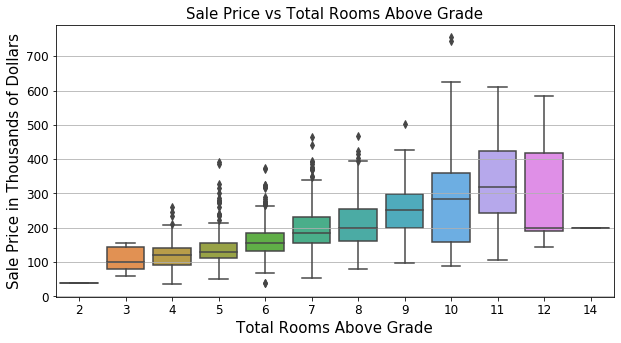

In [39]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.TotRmsAbvGrd, (train.SalePrice/1000))
plt.title('Sale Price vs Total Rooms Above Grade', fontsize = 15)
plt.xlabel('Total Rooms Above Grade',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y');

Parece que tenemos una casa con 14 cuartos que es ridículamente barata. Quitemos este outlier:

In [40]:
train = train.drop(train[train['TotRmsAbvGrd'] == 14].index).reset_index(drop=True)

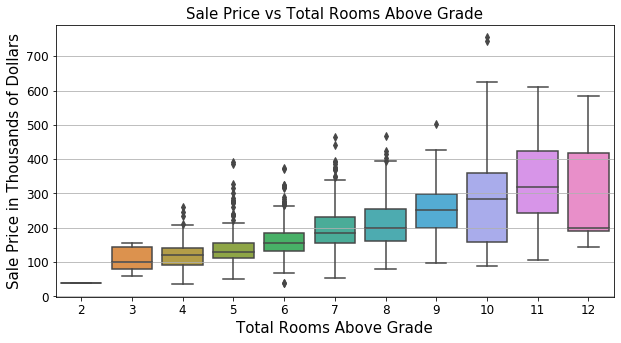

In [41]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.TotRmsAbvGrd, (train.SalePrice/1000))
plt.title('Sale Price vs Total Rooms Above Grade', fontsize = 15)
plt.xlabel('Total Rooms Above Grade',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y');

El problema ha sido arreglado.

### Garage Cars


#### Ejemplo

* Hacer un boxplot de la variable GarageCars vs SalePrice, identificar outliers, eliminarlos y graficar de nuevo.

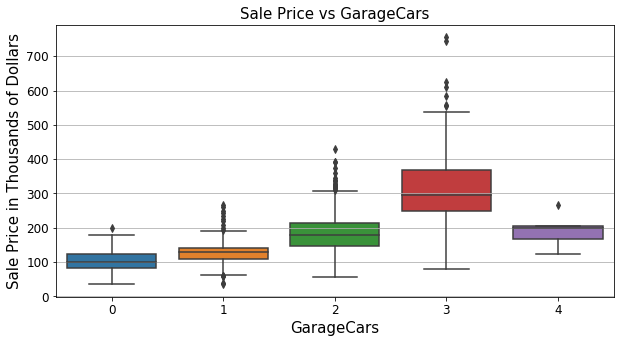

In [42]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.GarageCars, (train.SalePrice/1000))
plt.title('Sale Price vs GarageCars', fontsize = 15)
plt.xlabel('GarageCars',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y');

In [43]:
train = train.drop(train[train['GarageCars'] == 4].index).reset_index(drop=True)

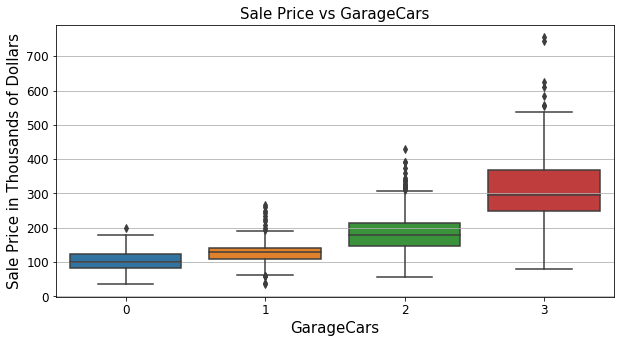

In [44]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.GarageCars, (train.SalePrice/1000))
plt.title('Sale Price vs GarageCars', fontsize = 15)
plt.xlabel('GarageCars',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y');

### Garage Area

# Ejercicio

* Hacer una gráfica de dispersión de la variable GarageArea vs SalePrice, identificar outliers, eliminarlos y graficar de nuevo.


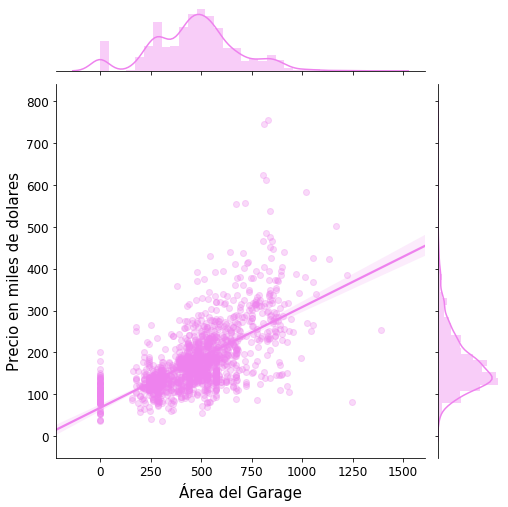

In [45]:
sbn.jointplot(train.GarageArea, (train.SalePrice/1000), kind = 'reg', 
              color = 'violet', height = 7, 
              scatter_kws=dict(alpha=0.3))
plt.xlabel('Área del Garage', fontsize = 15)
plt.ylabel('Precio en miles de dolares', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [46]:
train.GarageArea.quantile(0.9965)

1067.7440000000024

In [47]:
(train.SalePrice/1000).quantile(0.999)

690.8800000000247

In [48]:
#Eliminar outliers superiores
train = train.drop(train[(train['GarageArea']> train.GarageArea.quantile(0.9965)) 
           & (train['SalePrice'] < train.SalePrice.quantile(0.999))].index).reset_index(drop = True)

In [49]:
#Eliminar outliers inferiores
train = train.drop(train[train['SalePrice'] > train.SalePrice.quantile(0.999)].index).reset_index(drop = True)

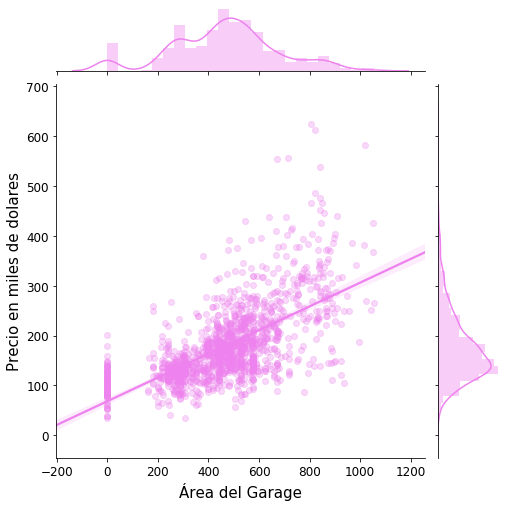

In [50]:
sbn.jointplot(train.GarageArea, (train.SalePrice/1000), kind = 'reg', 
              color = 'violet', height = 7, 
              scatter_kws=dict(alpha=0.3))
plt.xlabel('Área del Garage', fontsize = 15)
plt.ylabel('Precio en miles de dolares', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

----

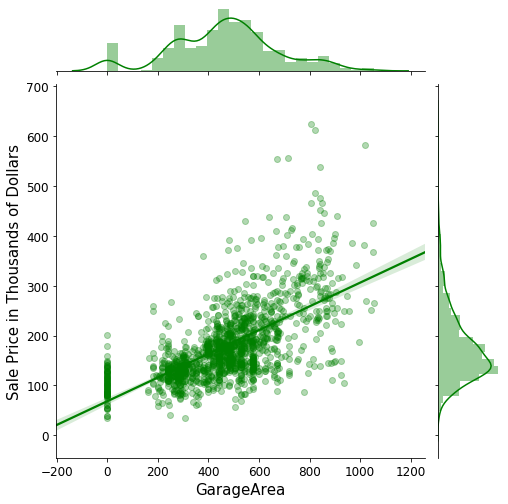

In [51]:
sbn.jointplot(train.GarageArea, (train.SalePrice/1000), kind = 'reg', color = 'g', height = 7,
             scatter_kws=dict(alpha=0.3))
plt.xlabel('GarageArea', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [52]:
train = train.drop(train[(train['GarageArea']> train.GarageArea.quantile(0.999)) 
           & (train['SalePrice'] < train.SalePrice.quantile(0.93))].index).reset_index(drop = True)

# Ejercicio:
Detecta outliers vs SalePrice
* OverallCond
* PoolQC
* SaleCondition

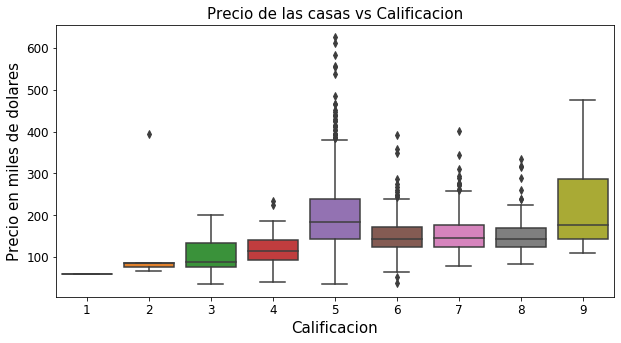

In [53]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.OverallCond,(train.SalePrice/1000))
plt.title('Precio de las casas vs Calificacion', fontsize = 15)
plt.xlabel('Calificacion',fontsize = 15)
plt.ylabel('Precio en miles de dolares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [54]:
train = train.drop(train[train['OverallCond'] ==5 ].index).reset_index(drop=True)

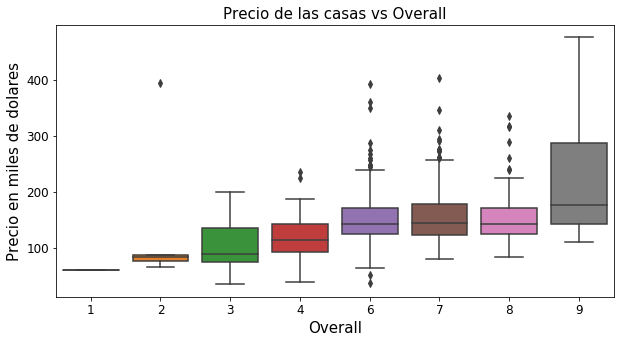

In [55]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.OverallCond,(train.SalePrice/1000))
plt.title('Precio de las casas vs Overall', fontsize = 15)
plt.xlabel('Overall',fontsize = 15)
plt.ylabel('Precio en miles de dolares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

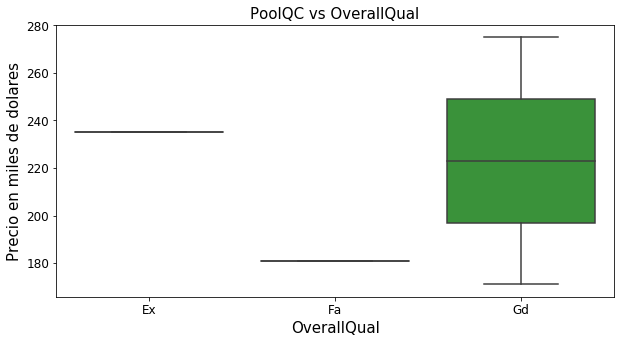

In [56]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.PoolQC,(train.SalePrice/1000))
plt.title('PoolQC vs OverallQual', fontsize = 15)
plt.xlabel('OverallQual',fontsize = 15)
plt.ylabel('Precio en miles de dolares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

### 1st Floor Surface

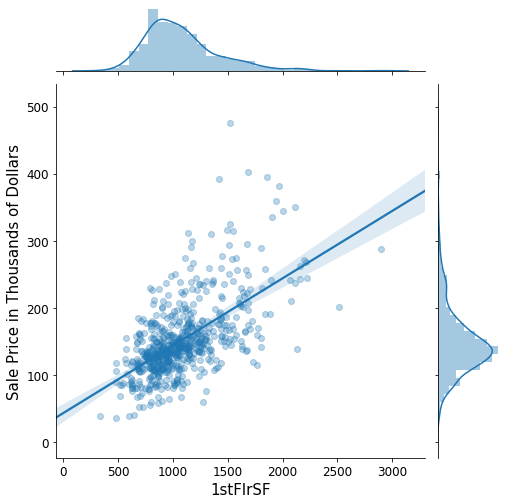

In [57]:
sbn.jointplot(train['1stFlrSF'], (train.SalePrice/1000), kind = 'reg', height = 7,
             scatter_kws=dict(alpha=0.3))
plt.xlabel('1stFlrSF', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Tampoco hay algo que arreglar aquí.

### Full Bath

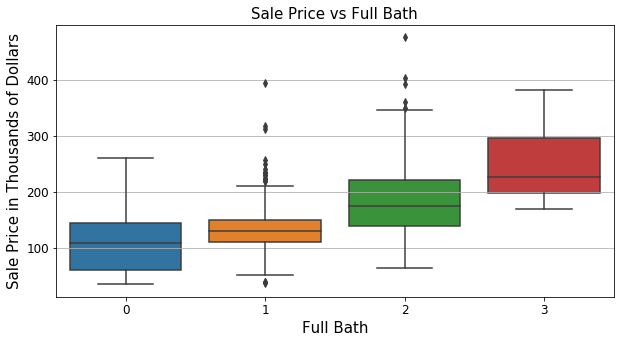

In [58]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.FullBath, (train.SalePrice/1000))
plt.title('Sale Price vs Full Bath', fontsize = 15)
plt.xlabel('Full Bath',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y');

Pese a que hay un pequeño extraño entre las casas con cero y un baño, no considero pertinente cambiar nada aquí tampoco.

In [59]:
train.FullBath.value_counts()

1    424
2    193
3     12
0      5
Name: FullBath, dtype: int64

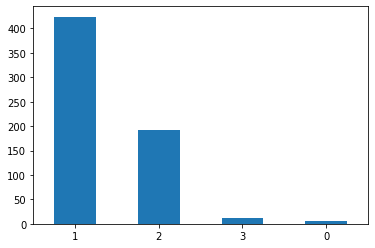

In [60]:
train.FullBath.value_counts().plot.bar(rot=0)

### Year Built

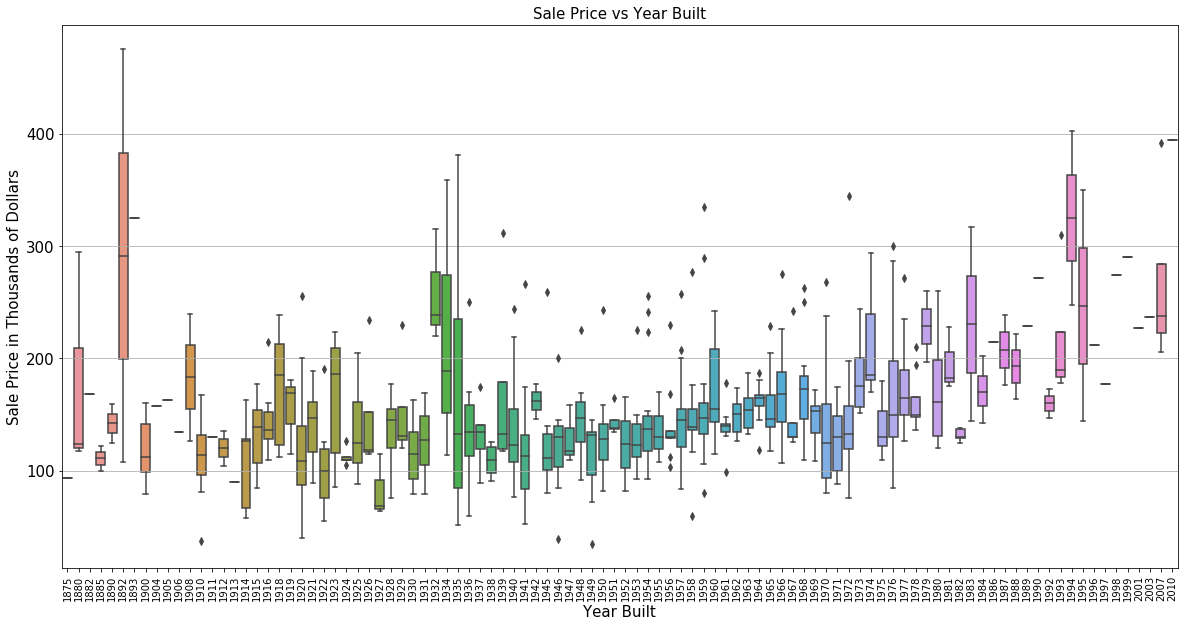

In [61]:
plt.figure(figsize = (20,10))
sbn.boxplot(train.YearBuilt, (train.SalePrice/1000))
plt.title('Sale Price vs Year Built', fontsize = 15)
plt.xlabel('Year Built',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 15)
plt.grid(axis = 'y');

No contamos con información para discriminar si hay un outlier aquí, el precio de una casa puede aumentar o disminuir mientras pasan los años, pero también podría tener que ver el año en qué se vendió y en qué situación económica se encontraba el país en ese año. 
Damos por terminado el análisis de las variables más correlacionadas con SalePrice.

## ¿En qué barrio había más casas?

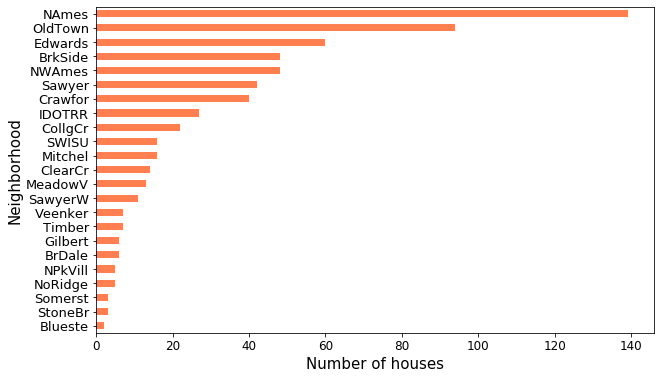

In [62]:
plt.figure(figsize=(10,6))
train.groupby('Neighborhood').SalePrice.count().sort_values(
    ascending = True).plot.barh(color='coral')
plt.xlabel('Number of houses', fontsize = 15)
plt.ylabel('Neighborhood',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 13);

# Ejercicio

* Graficar el número de casas contruidas por año.

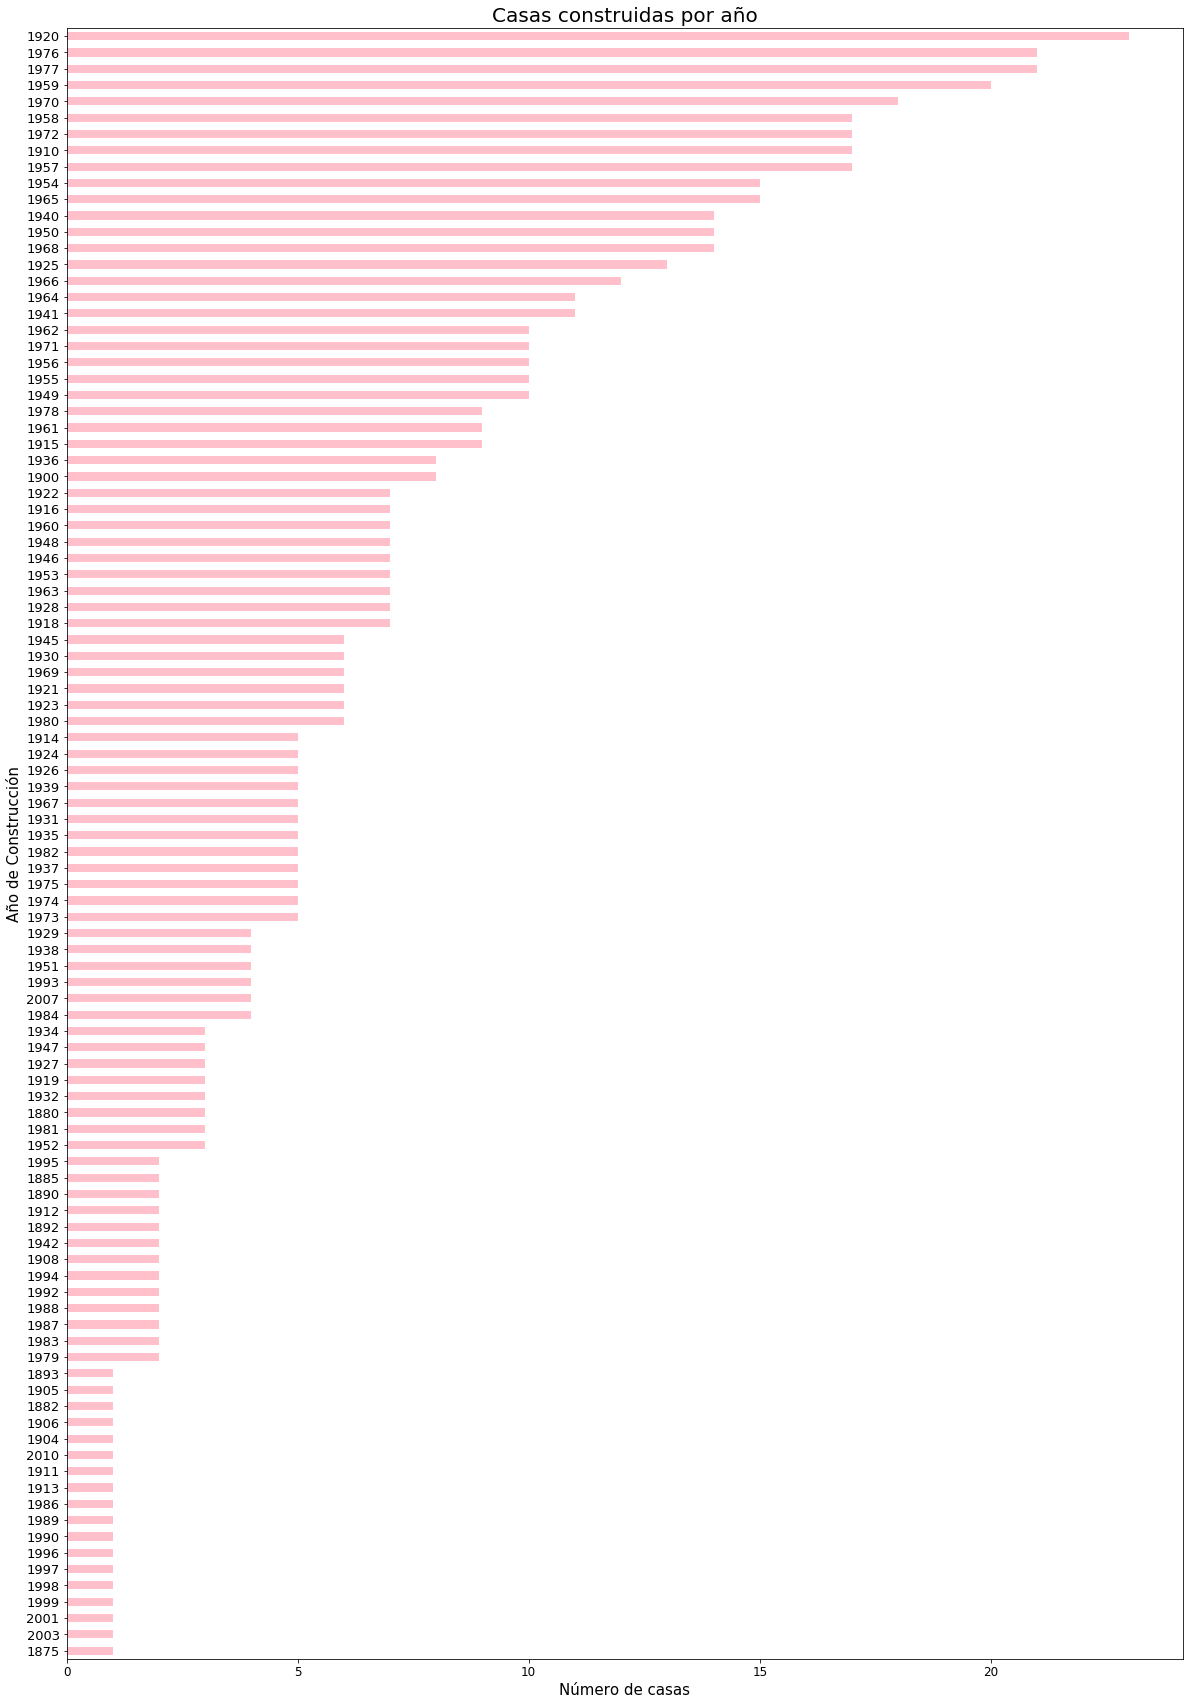

In [63]:
plt.figure(figsize=(20,30))
train.groupby('YearBuilt').SalePrice.count().sort_values(
    ascending = True).plot.barh(color='pink')
plt.xlabel('Número de casas', fontsize = 15)
plt.ylabel('Año de Construcción',fontsize = 15)
plt.title('Casas construidas por año', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 13);

# DataViz

In [64]:
plt.style.use('ggplot')
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (12,6)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
plt.rcParams.update(params)

## Histograma y KDE

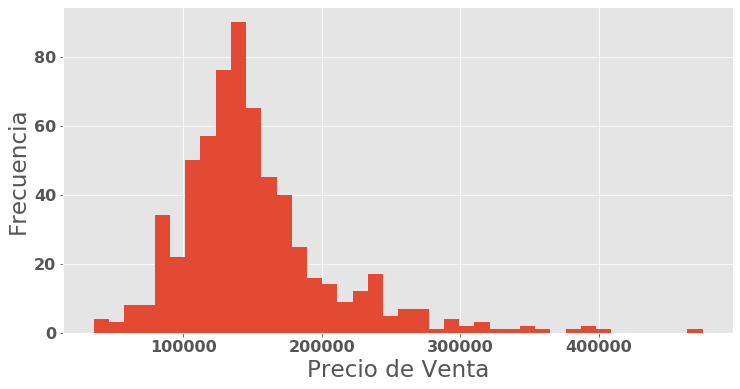

In [65]:
train.SalePrice.hist(bins=40)
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia");

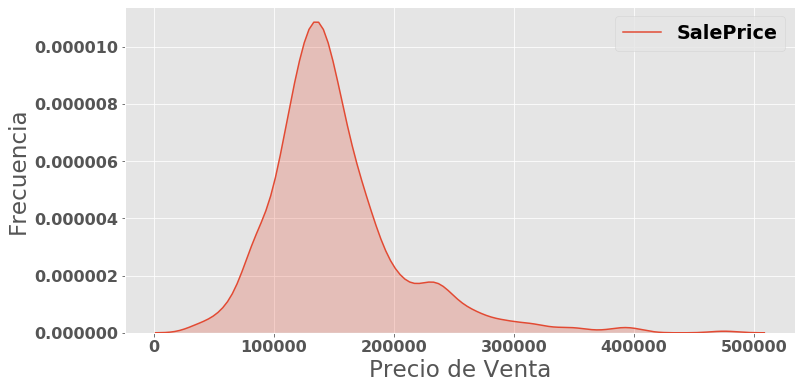

In [66]:
sbn.kdeplot(train.SalePrice,shade=True)
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia");

## Barras

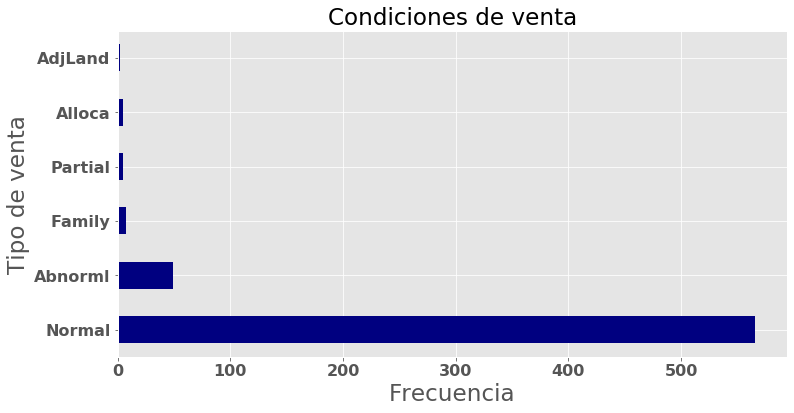

In [67]:
train.SaleCondition.value_counts().plot.barh(color='navy', title="Condiciones de venta")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo de venta");

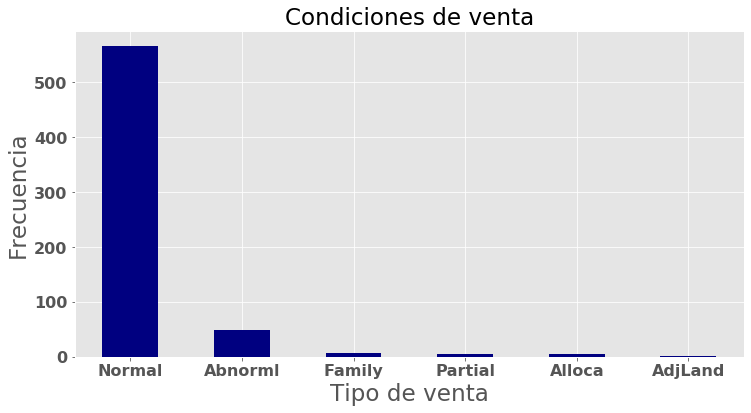

In [68]:
train.SaleCondition.value_counts().plot.bar(color='navy', title="Condiciones de venta", rot=0)
plt.xlabel("Tipo de venta")
plt.ylabel("Frecuencia");


## Gráficos de Área

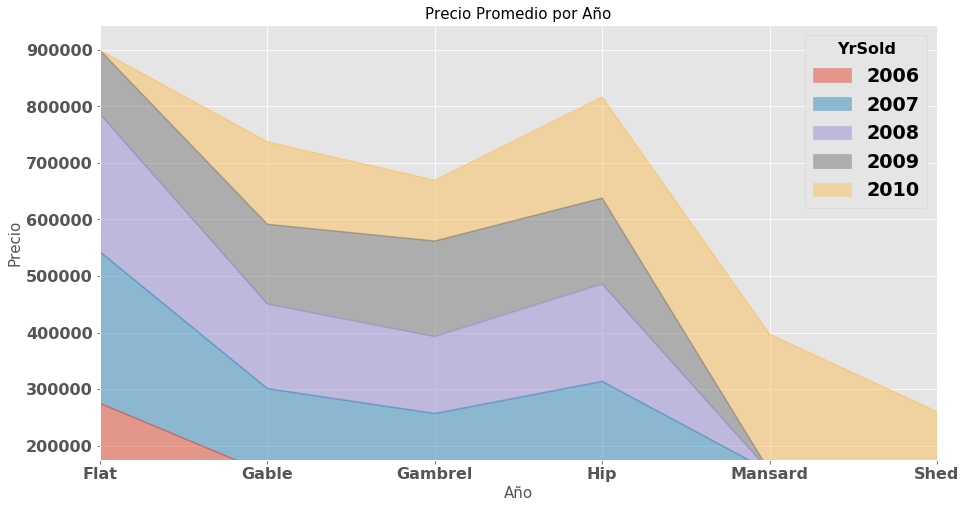

In [69]:
agg = train.groupby(["RoofStyle",'YrSold']).SalePrice.mean().unstack()
agg.plot.area(alpha=0.5, figsize=(15,8))
plt.ylim(175000,)
plt.title('Precio Promedio por Año', fontsize = 15)
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Precio', fontsize = 15);

## Dispersion

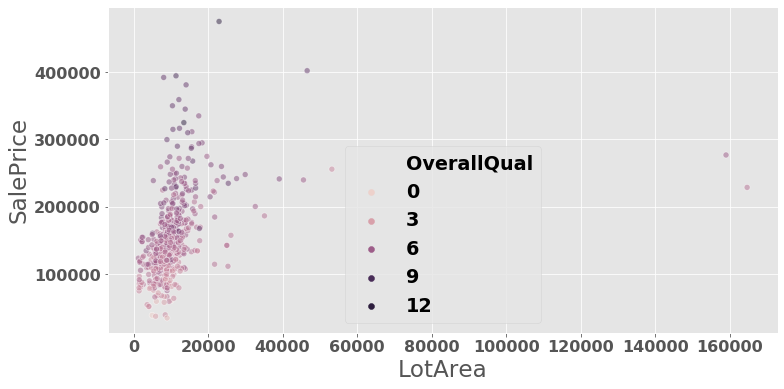

In [70]:
sbn.scatterplot(x='LotArea', y='SalePrice', alpha=0.5, data=train, hue='OverallQual')

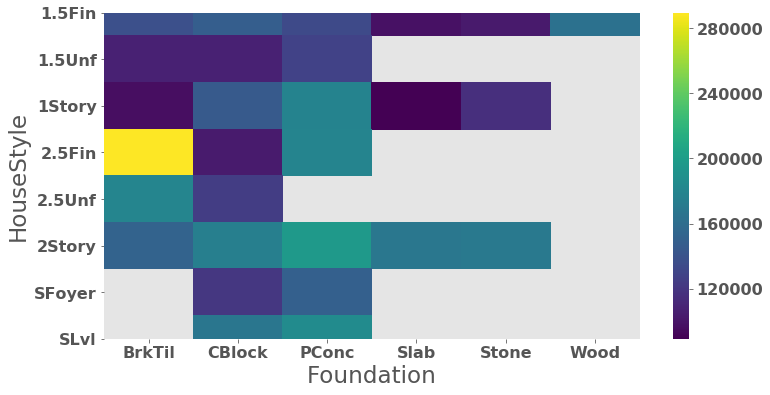

In [71]:
sbn.heatmap(train.groupby(["HouseStyle", "Foundation"]).SalePrice.mean().unstack(1), cmap='viridis',);

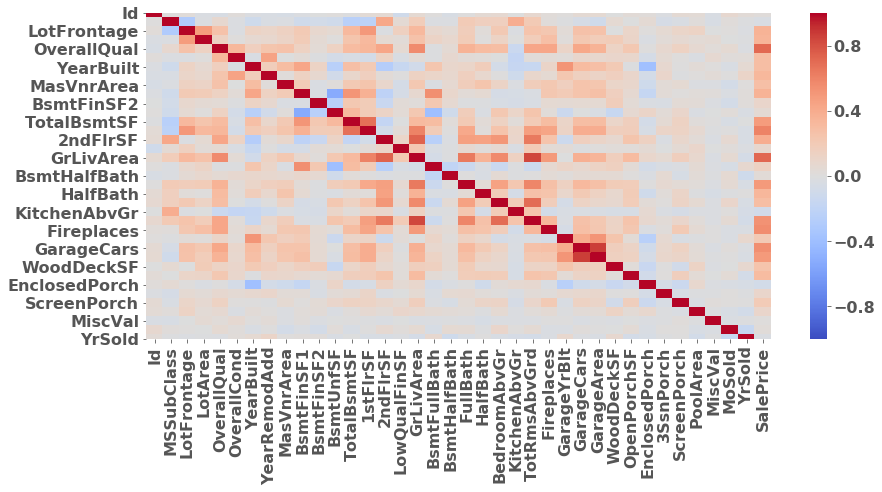

In [72]:
plt.figure(figsize=(14,6))
sbn.heatmap(train.corr(),cmap='coolwarm', annot=False, vmin=-1)

# Linea Serie de tiempo

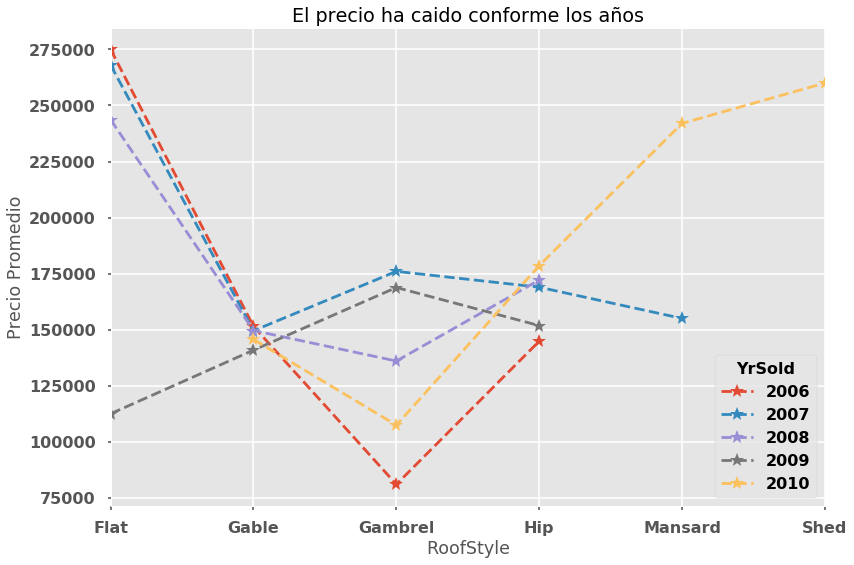

In [96]:
agg.plot(style='*--', ms=15, title='El precio ha caido conforme los años')
plt.ylabel('Precio Promedio');

# Histograma en 2D

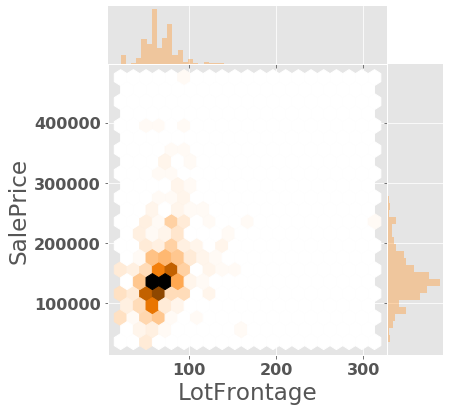

In [74]:
cmap=plt.cm.gist_heat_r
sbn.jointplot(train.LotFrontage,train.SalePrice, kind='hex', space=0, color=cmap(.2),
              joint_kws=dict(gridsize=20));

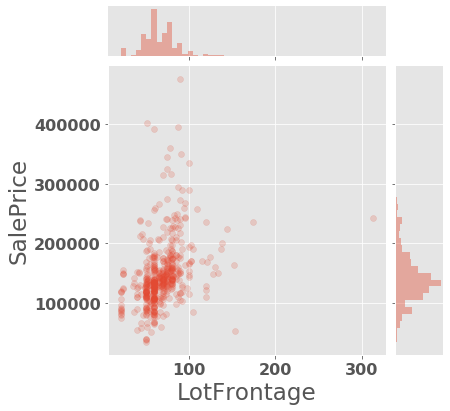

In [75]:
sbn.jointplot(train.LotFrontage,train.SalePrice, alpha=0.2);

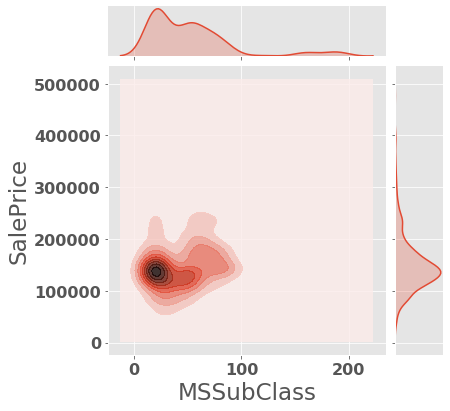

In [76]:
sbn.jointplot(train.MSSubClass,train.SalePrice, alpha=0.8, kind="kde");

# Violin Plots

In [77]:
for i in train.columns:
    if len(train[i].unique()) == 2:
        print(i)

Street
Utilities
CentralAir
BsmtHalfBath
KitchenAbvGr


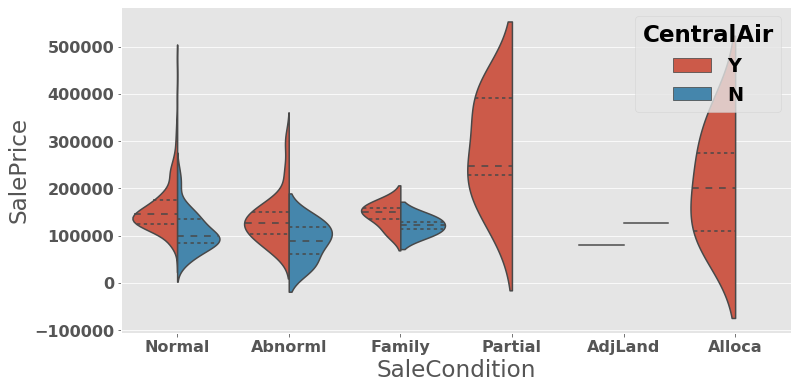

In [78]:
sbn.violinplot(x="SaleCondition", y="SalePrice", 
               split=True, inner="quart",hue="CentralAir",
               data=train);

## SwarmPlot

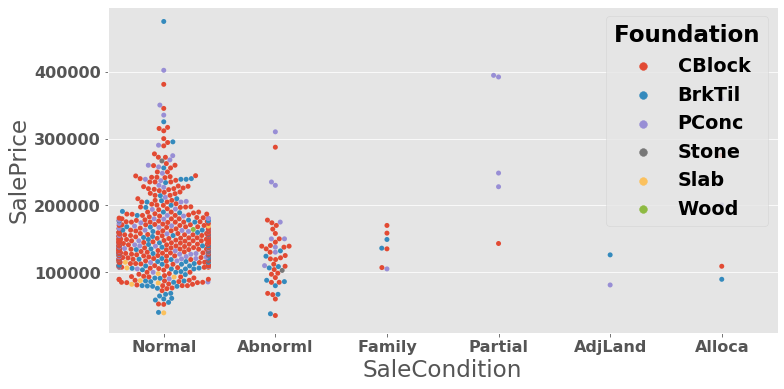

In [79]:
sbn.swarmplot(x="SaleCondition", y="SalePrice", 
              hue="Foundation",
#               palette=["r", "c", "y"],
              data=train);

## Pairplot

In [80]:
cols_sample = train.select_dtypes(include="int64").columns[:10]

In [81]:
mask = train.dtypes[train.dtypes == 'int64'].index.values

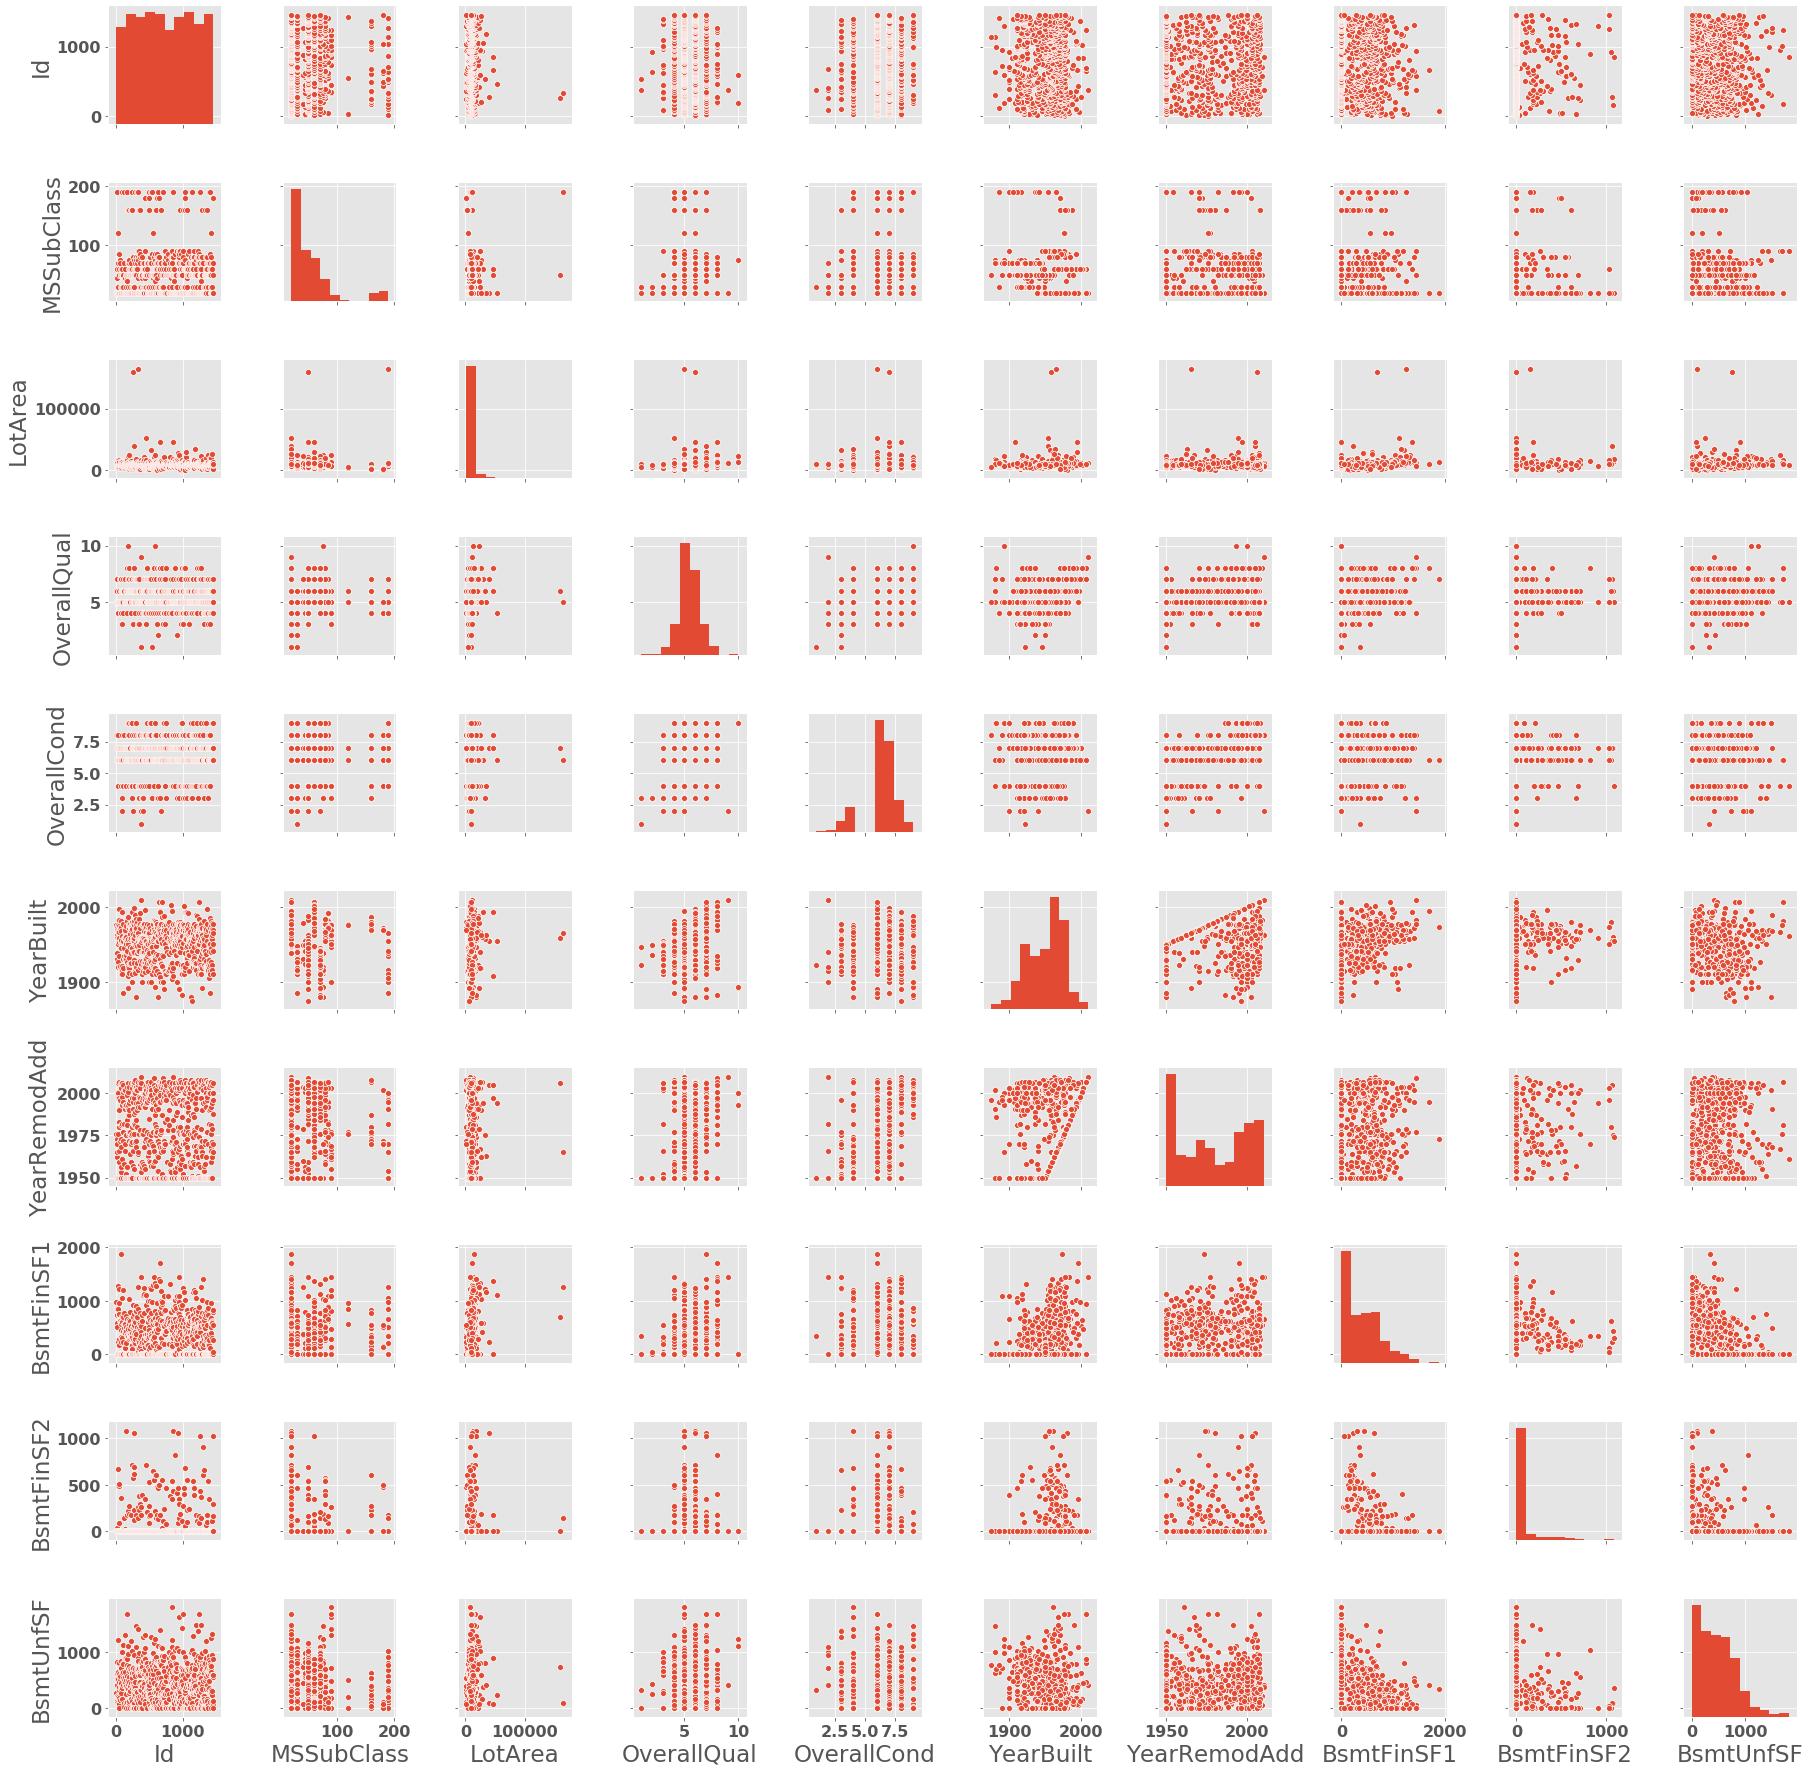

In [82]:
sbn.pairplot(train[cols_sample])

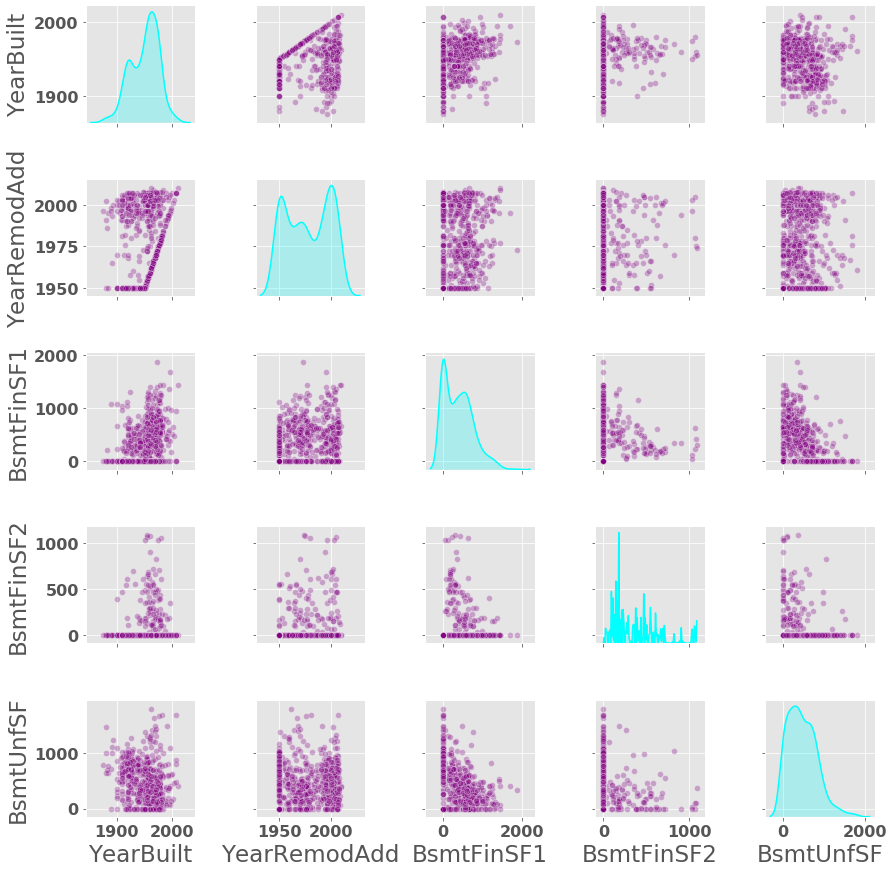

In [83]:
sbn.pairplot(train[mask[5:10]], plot_kws=dict(alpha=0.3, color='purple'),diag_kind='kde',diag_kws=dict(color='cyan'))

In [84]:
plt.style.use("seaborn-poster")

# **Lo que no se tiene que hacer**

Text(0.5, 1.0, 'grafico de barras con un solo valor')

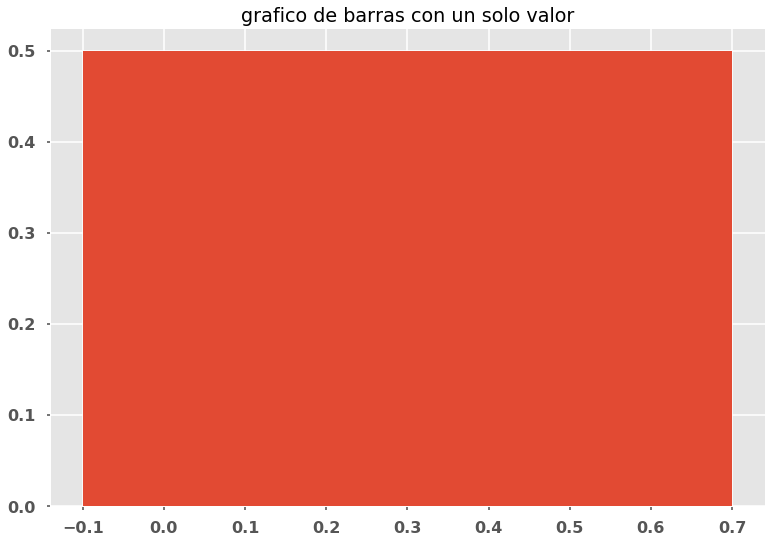

In [85]:
plt.bar(0.3, 0.5)
plt.title("grafico de barras con un solo valor")

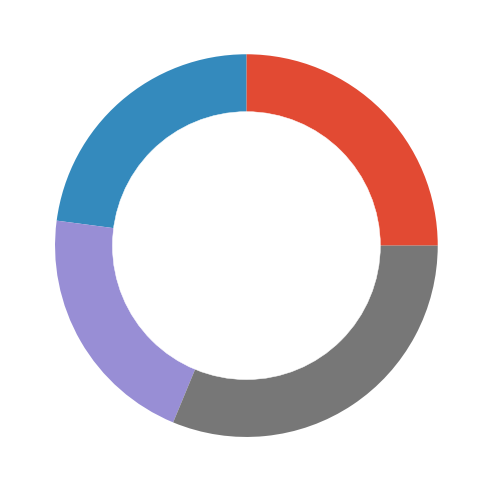

In [86]:
# create data
size_of_groups=[12,11,10,15]
 
# Create a pieplot
plt.pie(size_of_groups)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

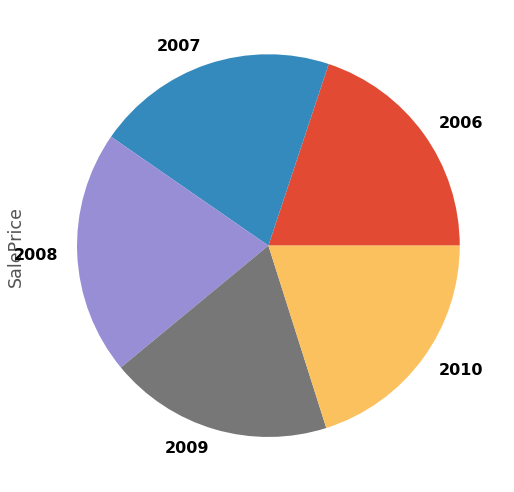

In [87]:
train.groupby('YrSold').SalePrice.mean().plot.pie();

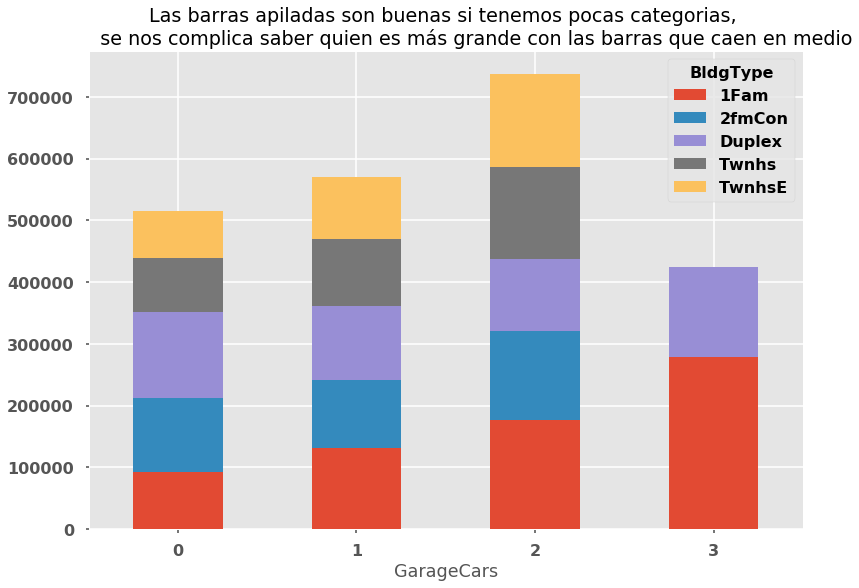

In [88]:
train.groupby(["GarageCars","BldgType"]).SalePrice.mean().unstack().plot.bar(stacked=True, rot=0)
plt.title("""Las barras apiladas son buenas si tenemos pocas categorias, 
          se nos complica saber quien es más grande con las barras que caen en medio""");

-----

# Anexo: mismo método get_dummies, pero con Label Encoder y OneHotEncoder

In [89]:
import pandas as pd

In [90]:
data = {'country': ['Belgium', 'France', 'France', 'Netherlands', 'Belgium']}
countries = pd.DataFrame(data)
countries

,country
0,Belgium
1,France
2,France
3,Netherlands
4,Belgium


Necesitamos convertir los objetos de la columna a números para poder incluirlos en el modelo de predicción. Usaremos la función LabelEncoder para lograrlo:

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
encoder = LabelEncoder()
countries.country = encoder.fit_transform(countries.country)
countries

,country
0,0
1,1
2,1
3,2
4,0


Con lo que se han asignado valores numéricos a cada país en estricto orden alfabético:

* Belgium = 0
* France = 1
* Netherlands = 2


Ahora nos enfrentamos a otro problema. La lista de arriba sugiere que Holanda es mayor que Francia y Bélgica lo cuál no tiene ningún sentido. Usaremos la función OneHotEncoder para solucionarlo:

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
onehotencoder = OneHotEncoder()
countries = onehotencoder.fit_transform(countries).toarray()
countries

C:\Users\iVoy\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [95]:
countries = pd.DataFrame(countries, columns= ['Belgium', 'France', 'Netherlands'])
countries

,Belgium,France,Netherlands
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
